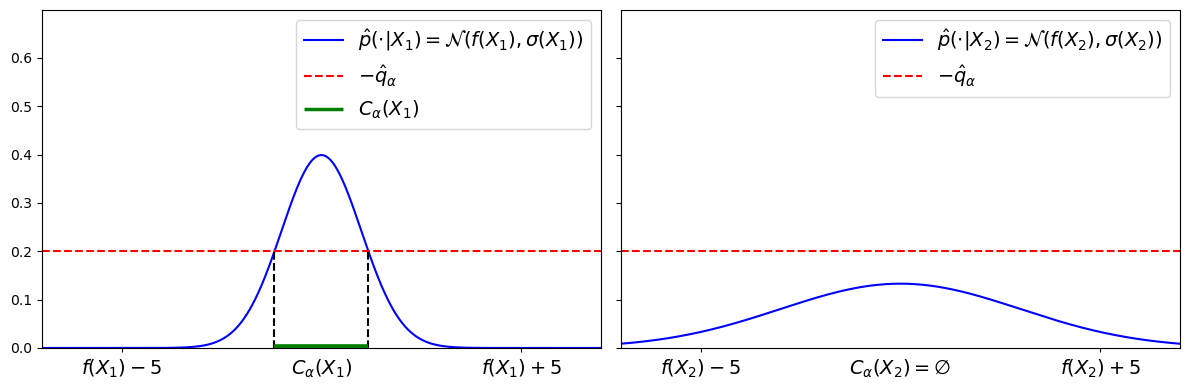

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
mu = 0
low_sigma = 1
high_sigma = 3

x = np.linspace(-7, 7, 1000)
y_low = norm.pdf(x, mu, low_sigma)
y_high = norm.pdf(x, mu, high_sigma)

y_threshold = 0.2 # Threshold for the horizontal line

fig, axs = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

def plot_density(ax, x, y, sigma, color, i):
    ax.plot(x, y, color="blue", label=fr'$\hat{{p}}(\cdot|X_{i}) =\mathcal{{N}}(f(X_{i}), σ(X_{i}))$')
    ax.axhline(y=y_threshold, color='red', linestyle='--', label=r'$-\hat{q}_\alpha$')

    crossing_indices = np.where(np.diff(y > y_threshold))[0]
    intersections = []

    for idx in crossing_indices:
        x0, x1 = x[idx], x[idx + 1]
        y0, y1 = y[idx], y[idx + 1]
        slope = (y1 - y0) / (x1 - x0)
        x_cross = x0 + (y_threshold - y0) / slope
        intersections.append(x_cross)

        ax.vlines(x_cross, 0, y_threshold, color='black', linewidth=1.5, linestyle='--')

    if len(intersections) == 2:
        ax.hlines(0, intersections[0], intersections[1], color='green', linewidth=2.5, linestyle='-', label=r'$C_\alpha(X_1)$')
        mid_x = (intersections[0] + intersections[1]) / 2
    else:
        pass
    if len(intersections) == 2:
        ax.hlines(0, intersections[0], intersections[1], color='green', linewidth=5.5, linestyle='-')
        mid_x = (intersections[0] + intersections[1]) / 2
    else:
        pass
    ax.legend()

# Low variance
plot_density(axs[0], x, y_low, low_sigma, 'blue', i=1)

# High variance
plot_density(axs[1], x, y_high, high_sigma, 'green', i=2)

axs[0].set_ylim(0, max(y_low.max(), y_high.max()) + 0.30)
axs[0].set_xlim(-7, 7)
axs[1].set_xlim(-7, 7)


tick_lengths = [3, 0, 3]

for tick, length in zip(axs[0].xaxis.get_major_ticks(), tick_lengths):
    tick.tick1line.set_markersize(length)  # bottom ticks
    tick.tick2line.set_markersize(length)  # top ticks

for tick, length in zip(axs[1].xaxis.get_major_ticks(), tick_lengths):
    tick.tick1line.set_markersize(length)  # bottom ticks
    tick.tick2line.set_markersize(length)  # top ticks

axs[0].set_xticks([-5, 0, 5])
axs[0].set_xticklabels([r'$f(X_1) - 5$', r'$C_\alpha(X_1)$', r'$f(X_1) + 5$'], fontsize=14)

axs[1].set_xticks([-5, 0, 5])
axs[1].set_xticklabels([r'$f(X_2) - 5$', r'$C_\alpha(X_2) = \varnothing$', r'$f(X_2) + 5$'], fontsize=14)

axs[0].legend(fontsize=14)
axs[1].legend(fontsize=14)

plt.savefig(f"../figs/illustration_failure_NL.png", dpi = 300, bbox_inches='tight')
plt.savefig(f"../figs/illustration_failure_NL.pdf", dpi = 300, bbox_inches='tight')

plt.tight_layout()
plt.show()


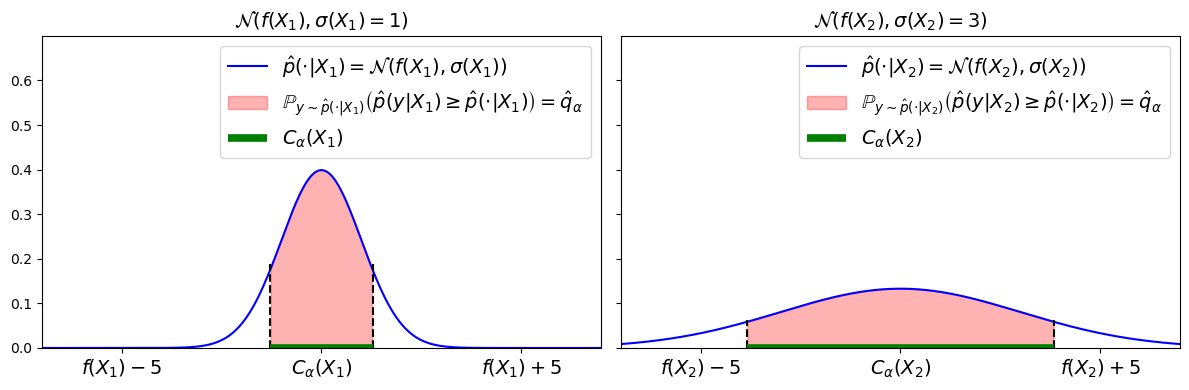

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
mu = 0
low_sigma = 1
high_sigma = 3
alpha = 0.2  # confidence level 1 - alpha = 0.8

# Confidence interval bounds (quantiles alpha/2 and 1 - alpha/2)
q_lower = norm.ppf(alpha / 2, loc=mu, scale=low_sigma)
q_upper = norm.ppf(1 - alpha / 2, loc=mu, scale=low_sigma)

q_lower_high = norm.ppf(alpha / 2, loc=mu, scale=high_sigma)
q_upper_high = norm.ppf(1 - alpha / 2, loc=mu, scale=high_sigma)

x = np.linspace(-7, 7, 1000)
y_low = norm.pdf(x, mu, low_sigma)
y_high = norm.pdf(x, mu, high_sigma)

fig, axs = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

def plot_density_quantiles(ax, x, y, q_low, q_up, sigma_label, color_fill='red', i=1):
    ax.plot(x, y, color="blue", label=fr'$\hat{{p}}(\cdot|X_{i}) =\mathcal{{N}}(f(X_{i}), σ(X_{i}))$')
    
    mask = (x >= q_low) & (x <= q_up)
    ax.fill_between(
        x[mask],
        y[mask],
        color=color_fill,
        alpha=0.3,
        label=fr'$\mathbb{{P}}_{{y \sim \hat{{p}}(\cdot|X_{i})}}\left( \hat{{p}}(y|X_{i}) \geq \hat{{p}}(\cdot|X_{i}) \right) = \hat{{q}}_\alpha$'
    )

    ax.vlines([q_low, q_up], 0, norm.pdf([q_low, q_up], loc=mu, scale=(q_up - q_low)/2),
              color='black', linewidth=1.5, linestyle='--')
    
    ax.hlines(0, q_low, q_up, color='green', linewidth=5.5, linestyle='-', label = fr'$C_\alpha(X_{i})$')

    mid_x = (q_low + q_up) / 2

    ax.set_xlim(-7, 7)
    ax.set_title(sigma_label, fontsize=14)
    ax.legend(fontsize=14, loc='upper right')

# Plot low variance
plot_density_quantiles(
    axs[0], x, y_low, q_lower, q_upper,
    r'$\mathcal{N}(f(X_1), \sigma(X_1) = 1)$'
)

# Plot high variance
plot_density_quantiles(
    axs[1], x, y_high, q_lower_high, q_upper_high,
    r'$\mathcal{N}(f(X_2), \sigma(X_2) = 3)$',
    i=2
)

axs[0].set_xticks([-5, 0, 5])
axs[0].set_xticklabels([r'$f(X_1) - 5$', r'$C_\alpha(X_1)$', r'$f(X_1) + 5$'], fontsize=14)

axs[1].set_xticks([-5, 0, 5])
axs[1].set_xticklabels([r'$f(X_2) - 5$', r'$C_\alpha(X_2)$', r'$f(X_2) + 5$'], fontsize=14)

# Y limits
axs[0].set_ylim(0, max(y_low.max(), y_high.max()) + 0.30)

plt.savefig(f"../figs/illustration_levelsets.png", dpi = 300, bbox_inches='tight')
plt.savefig(f"../figs/illustration_levelsets.pdf", dpi = 300, bbox_inches='tight')

plt.tight_layout()
plt.show()
